In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:23:00.0)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train[0].shape

(28, 28)

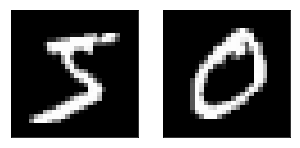

In [5]:
fig = plt.figure(figsize=(5, 5))

axs = fig.add_subplot(1, 2, 1, xticks = [], yticks=[])
axs.imshow(x_train[0], cmap='gray')

axs = fig.add_subplot(1, 2, 2, xticks = [], yticks=[])
axs.imshow(x_train[1], cmap='gray')

plt.show()

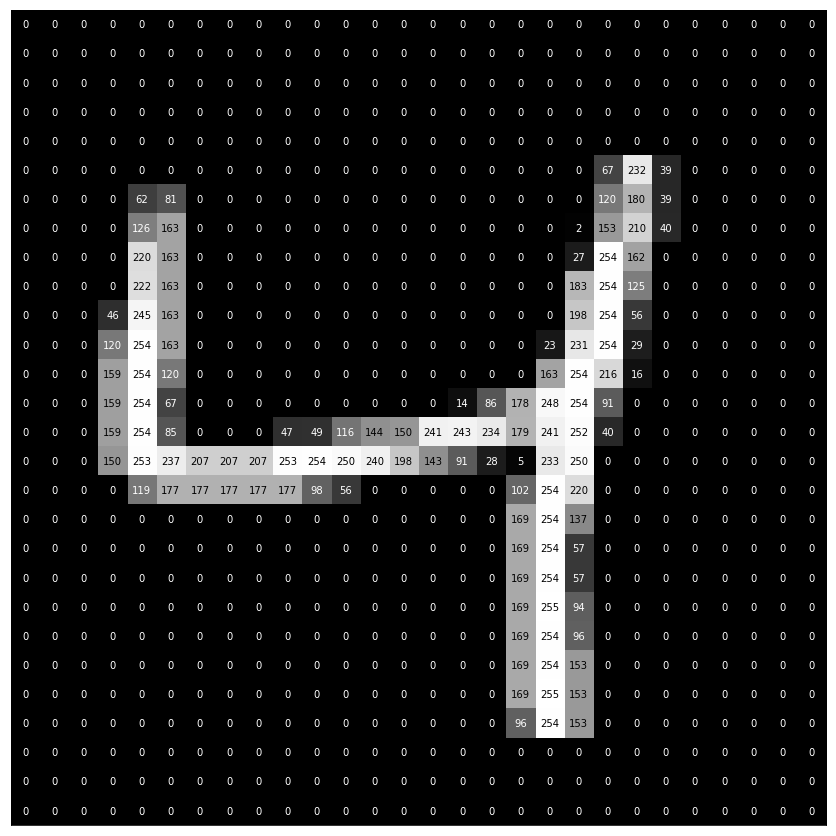

In [6]:
fig = plt.figure(figsize=(15, 15))
img_index = 2

axs = fig.add_subplot(1, 1, 1, xticks = [], yticks=[])
axs.imshow(x_train[img_index], cmap='gray')
width, height = x_train[img_index].shape

for w in range(width):
    for h in range(height):
        axs.annotate(x_train[img_index][h][w], 
                     xy=(w, h),
                     horizontalalignment='center',
                     verticalalignment='center', 
                     color='white' if x_train[img_index][h][w] < 127 else 'black')
plt.show()

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [9]:
from keras.utils import np_utils
# One hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [12]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='self.mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True, monitor='val_acc')

model.fit(x_train, y_train, validation_split=0.2, batch_size=1024, epochs=100, callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 0s - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0770 - val_acc: 0.9798
Epoch 2/100
48000/48000 [==============================] - 0s - loss: 0.0140 - acc: 0.9953 - val_loss: 0.0926 - val_acc: 0.9784
Epoch 3/100
48000/48000 [==============================] - 0s - loss: 0.0132 - acc: 0.9955 - val_loss: 0.0780 - val_acc: 0.9816
Epoch 4/100
48000/48000 [==============================] - 0s - loss: 0.0131 - acc: 0.9954 - val_loss: 0.0843 - val_acc: 0.9801
Epoch 5/100
48000/48000 [==============================] - 0s - loss: 0.0128 - acc: 0.9960 - val_loss: 0.0903 - val_acc: 0.9797
Epoch 6/100
48000/48000 [==============================] - 0s - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0861 - val_acc: 0.9816
Epoch 7/100
48000/48000 [==============================] - 0s - loss: 0.0101 - acc: 0.9962 - val_loss: 0.1075 - val_acc: 0.9758
Epoch 8/100
48000/48000 [=============================

48000/48000 [==============================] - 0s - loss: 0.0043 - acc: 0.9985 - val_loss: 0.1352 - val_acc: 0.9783
Epoch 33/100
48000/48000 [==============================] - 0s - loss: 0.0044 - acc: 0.9986 - val_loss: 0.1240 - val_acc: 0.9807
Epoch 34/100
48000/48000 [==============================] - 0s - loss: 0.0036 - acc: 0.9989 - val_loss: 0.1261 - val_acc: 0.9805
Epoch 35/100
48000/48000 [==============================] - 0s - loss: 0.0031 - acc: 0.9990 - val_loss: 0.1778 - val_acc: 0.9744
Epoch 36/100
48000/48000 [==============================] - 0s - loss: 0.0041 - acc: 0.9988 - val_loss: 0.1246 - val_acc: 0.9812
Epoch 37/100
48000/48000 [==============================] - 0s - loss: 0.0031 - acc: 0.9989 - val_loss: 0.1223 - val_acc: 0.9817
Epoch 38/100
48000/48000 [==============================] - 0s - loss: 0.0035 - acc: 0.9988 - val_loss: 0.1299 - val_acc: 0.9797
Epoch 39/100
48000/48000 [==============================] - 0s - loss: 0.0037 - acc: 0.9987 - val_loss: 0.1191

48000/48000 [==============================] - 0s - loss: 0.0031 - acc: 0.9991 - val_loss: 0.1397 - val_acc: 0.9814
Epoch 65/100
48000/48000 [==============================] - 0s - loss: 0.0024 - acc: 0.9993 - val_loss: 0.1281 - val_acc: 0.9831
Epoch 66/100
48000/48000 [==============================] - 0s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.1257 - val_acc: 0.9828
Epoch 67/100
48000/48000 [==============================] - 0s - loss: 0.0030 - acc: 0.9990 - val_loss: 0.1419 - val_acc: 0.9818
Epoch 68/100
48000/48000 [==============================] - 0s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.1387 - val_acc: 0.9814
Epoch 69/100
48000/48000 [==============================] - 0s - loss: 0.0023 - acc: 0.9993 - val_loss: 0.1289 - val_acc: 0.9833
Epoch 70/100
48000/48000 [==============================] - 0s - loss: 0.0032 - acc: 0.9992 - val_loss: 0.1329 - val_acc: 0.9823
Epoch 71/100
48000/48000 [==============================] - 0s - loss: 0.0022 - acc: 0.9993 - val_loss: 0.1396

48000/48000 [==============================] - 0s - loss: 0.0020 - acc: 0.9993 - val_loss: 0.1381 - val_acc: 0.9822
Epoch 97/100
48000/48000 [==============================] - 0s - loss: 0.0018 - acc: 0.9996 - val_loss: 0.1493 - val_acc: 0.9826
Epoch 98/100
48000/48000 [==============================] - 0s - loss: 0.0032 - acc: 0.9993 - val_loss: 0.1593 - val_acc: 0.9810
Epoch 99/100
48000/48000 [==============================] - 0s - loss: 0.0029 - acc: 0.9993 - val_loss: 0.1543 - val_acc: 0.9813
Epoch 100/100
48000/48000 [==============================] - 0s - loss: 0.0017 - acc: 0.9993 - val_loss: 0.1460 - val_acc: 0.9823


In [17]:
model.load_weights('self.mnist.model.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: " + str(score[1]))

Test Accuracy: 0.9838
